> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

#‘ScheduledDay’ tells us on what day the patient set up their appointment.
#‘Neighborhood’ indicates the location of the hospital.
#‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


### Question(s) for Analysis
What are the factors that are important for us to know on which we will predict if a patient will show up for their scheduled appointment?

In [1]:
# All the import statments
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
# Shape of the given dataset.
df.shape

(110527, 14)

In [4]:
# Cheking if there any duplicate rows.
df.duplicated().sum()

0

In [5]:
# Cheking if there duplicated values for the patientId column (if there are any duplicated patients).
df['PatientId'].duplicated().sum()

48228

In [6]:
## Cheking if there unique values for the patientId column.
df['PatientId'].nunique()

62299

#### We conclude from the above analysis that there are 48228 duplicated patients Id and 6229 unique patients Id.

In [7]:
# Cheking if there duplicated patientId and noshow to remove them in the data cleaning stage.
df.duplicated(['PatientId','No-show']).sum()

38710

In [8]:
# Showing information about the whole dataset to see if there null values needed to be removed in the cleanig stage. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### we conclude that there is no missing values.

In [9]:
# Cheking some statistical information about the dataset.
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

#### The min age -1 will be removed in the cleaning stage, and we conclude that the majority are not handcap and don't have chronic diseases.

In [10]:
# Cheking how many row having this -1 value in age.
age_out_of_range = df.query('Age=="-1"')
age_out_of_range

PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No

#### There is only one row that contains -1 and we have a large dataset, so removing this row won't affect the dataset that much, but we will remove it.


### Data Cleaning
 

In [11]:
# Removing the row that contains the -1 value
df.drop(index=99832,inplace=True)

In [12]:
# Changing some columns names as it written in a wrong format
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)

In [13]:
# Removing duplicated patientId and noshow.
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [14]:
# Removing columns that is not necessary.
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.shape

(71816, 10)

<a id='eda'></a>
## Exploratory Data Analysis

Now that we have trimmed and cleaned our data, we are ready to move on to exploration.

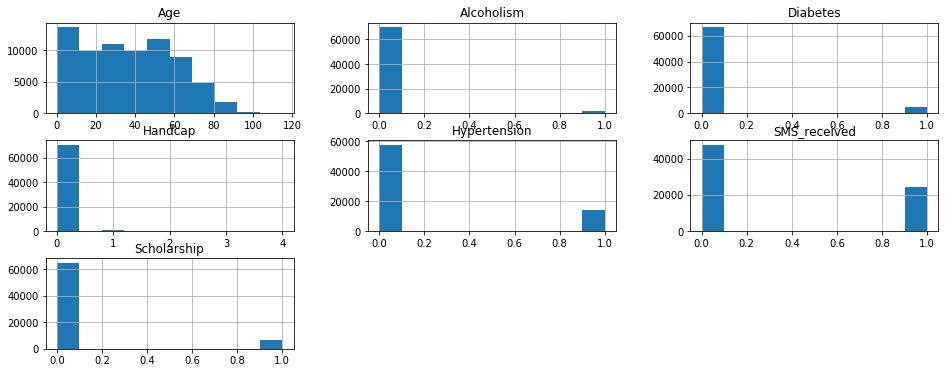

In [15]:
# General look on the histograms
df.hist(figsize=(16,6));

In [16]:
# Dividing the dataset to two sets according to showing or no showning to explore them.
show = df.No_show == 'No'
not_show = df.No_show =='Yes'
df[show].count(),df[not_show].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

#### No. of patients that showed are 54153, while the No. of patients that didn't show are 17663.

In [17]:
# Calculating the mean for each of show and not_show.
df[show].mean(),df[not_show].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

## Investigating the factors that affect the attendance rate

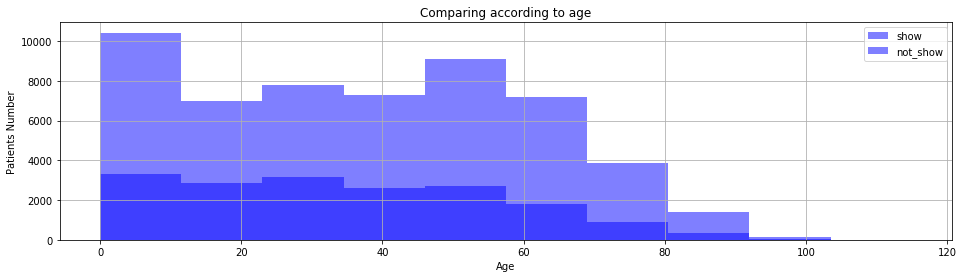

In [18]:
# Cheking if the age affects or not
def attendance_age(df,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='blue',label='show')
    df[col_name][not_show].hist(alpha=.5,bins=10,color='blue',label='not_show')
    plt.legend();
    plt.title('Comparing according to age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance_age(df,'Age',show,not_show)

#### Patients of age 0:8 are the most showing, then from 45:55 and the least attending are patients of age above 65 years old

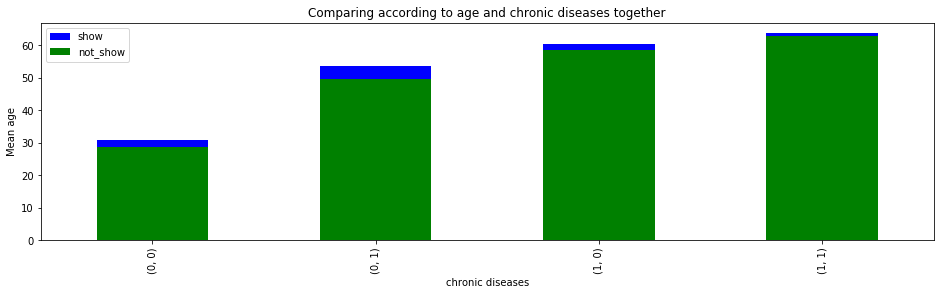

In [19]:
#Cheking if the age and chronic diseases together affect the attendance of the patients.
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[not_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='green',label='not_show')
plt.legend();
plt.title('Comparing according to age and chronic diseases together')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [20]:
# Calculating the mean for both show and noshow according to chronic diseases and age
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[not_show].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

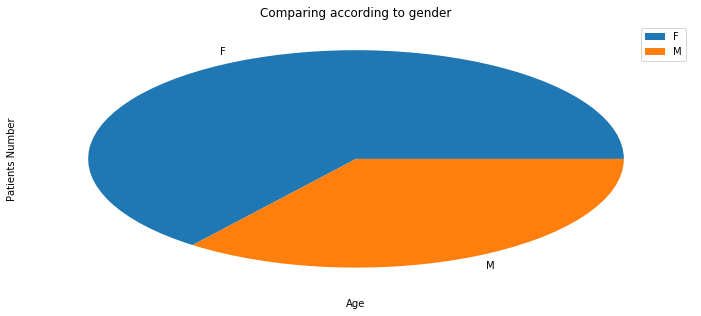

In [21]:
# Cheking if the gender of the patients affects there showing
# Show
def attendance_gender(df,col_name,attended):
    plt.figure(figsize=[12,5])
    df[col_name][attended].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('Comparing according to gender')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance_gender(df,'Gender',show)

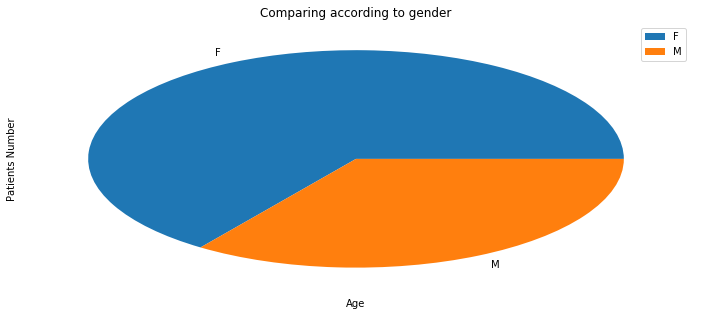

In [22]:
# not_show
attendance_gender(df,'Gender',not_show)

#### We Conclude that the gender has no effect.

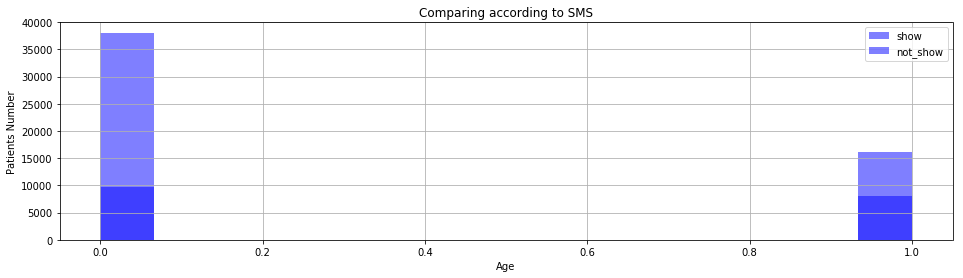

In [23]:
# Does receiving a confirmation message affects the attendance of the patient.
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=15,color='blue',label='show')
    df[col_name][not_show].hist(alpha=.5,bins=15,color='blue',label='not_show')
    plt.legend();
    plt.title('Comparing according to SMS')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df,'SMS_received',show,not_show)

#### We conclude that the number of patients that attend without receiving a confirmation message is larger than the number of patients who received SMS

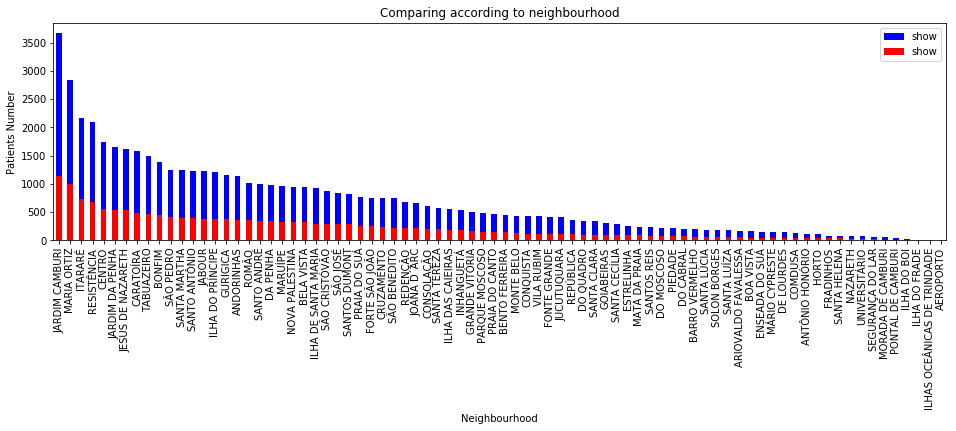

In [24]:
# Cheking if the neighbourhood affect the attendance
plt.figure(figsize=[16,4])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[not_show].value_counts().plot(kind='bar',color='red',label='show')
plt.legend();
plt.title('Comparing according to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

#### Neighbourhood has a great effect on the attendace rate of the patients, where JARDIM CAMBURI has the greatest number of patients and the greatest showing rate

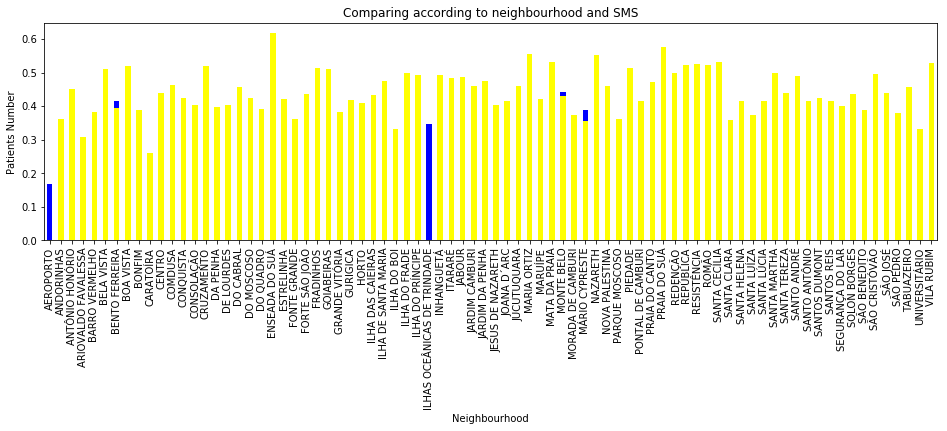

In [25]:
# How about the Neighbourhood and the age togethere.
plt.figure(figsize=[16,4])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show')
df[not_show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='yellow',label='show')
plt.title('Comparing according to neighbourhood and SMS')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

#### SMS has effect in only 5 neighbourhoods, ILHAS OCEANICAS DE TRINDA is the most responsive neighbourhood to SMS

<a id='conclusions'></a>
## Conclusions

### Results:
1.There is no big difference between the distribution of Age between patients who showed up for the appointment versus the patients who didn't.

2.There is a higher percentage of people that received an SMS and did not show up when compared to people who received an SMS and did show up.

3.People that have a disease are 3% more likely to show up for the appointment than people who do not have a disease.

4.Handicap patients specifically,however,are more likely to show up to the appointment compared to people who are not Handicap.

5.Being enrolled in the Scholarship program does not seem to make people more likely to show up to the appointment.

### Limitations:
1.Most of our variables are categorical, which does not allow for a high level of statistical method that can be used to provide correlations etc.

2.The statistics used here are descriptive statistics, not inferential, meaning that we did not create any hypotheses or controlled experiments or imferences with our data.

3.We do not have a lot of details for certain factors to draw conclusions. For example they may target No-showers with SMS, or they may send the SMS once the Patient has not checked in 30 minutes prior to their appointment etc.

4.Cannot show strong correlations between factors since most of our data is categorical.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])